# Full Workflow: From R script to Jupyter Notebook & Binder


In this example, we'll be converting an existing R script from past analyses to a Jupyter Notebook. The original script (Demo_pt2.r) shows a sample project workflow, starting with scores on big five personality items, creating composite scores, assessing psychometric properties, and also examining the relationship between conscientiousness, age, and gender. We'll also be building a Binder, making our analyses interactive and reproducible. This example will display from start to finish, how to convert existing analyses into an interactive, literate code document. 

Here is the general process:
1. Launch JupyterLab from Anaconda
2. Add in code & text to your Jupyter Notebook
3. Save and upload/push .ipynb file to GitHub
4. Add Configuration Files
5. Build Binder
6. Add Binder Button to GitHub README
7. Launch & explore Binder


Load R packages

In [3]:
library(ggplot2)
library(psych)
library(dplyr)

These analyses use the BFI dataset from the R psych package (https://www.personality-project.org/r/html/bfi.html). This dataset includes 2800 responses to 25 personality self-report items from the International Personality Item Pool (ipip.ori.org). Participant gender (1=male, 2=female), education (1 = HS, 2 = finished HS, 3 = some college, 4 = college graduate 5 = graduate degree), and age (in years) are also included. 

In [6]:
bfi_data<-bfi #load bfi dataset
head(bfi_data) #view first few cases of dataset

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
61617,2,4,3,4,4,2,3,3,4,4,...,2,3,3,6,3,4,3,1,NA,16
61618,2,4,5,2,5,5,4,4,3,4,...,5,5,4,2,4,3,3,2,NA,18
61620,5,4,5,4,4,4,5,4,2,5,...,2,3,4,2,5,5,2,2,NA,17
61621,4,4,6,5,5,4,4,3,5,5,...,4,1,3,3,4,3,5,2,NA,17
61622,2,3,3,4,5,4,4,5,3,2,...,4,3,3,3,4,3,3,1,NA,17
61623,6,6,5,6,5,6,6,6,1,3,...,2,3,4,3,5,6,1,2,3,21


In [7]:
describe (bfi_data) #look at descriptives for each variable

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
A1,1,2784,2.413434,1.4077372,2,2.230251,1.4826,1,6,5,0.82504356,-0.30763947,0.026680069
A2,2,2773,4.802380,1.1720199,5,4.977017,1.4826,1,6,5,-1.12428533,1.05483862,0.022256663
A3,3,2774,4.603821,1.3018336,5,4.788288,1.4826,1,6,5,-0.99845684,0.44204096,0.024717370
A4,4,2781,4.699748,1.4796327,5,4.932584,1.4826,1,6,5,-1.03094275,0.04045252,0.028057788
A5,5,2784,4.560345,1.2585121,5,4.711849,1.4826,1,6,5,-0.84723335,0.15890562,0.023851889
C1,6,2779,4.502339,1.2413465,5,4.640899,1.4826,1,6,5,-0.85470158,0.30442934,0.023547715
C2,7,2776,4.369957,1.3183465,5,4.502250,1.4826,1,6,5,-0.74181968,-0.13643987,0.025021875
C3,8,2780,4.303957,1.2885518,5,4.417716,1.4826,1,6,5,-0.69145540,-0.13233095,0.024438778
C4,9,2774,2.553353,1.3751181,2,2.413514,1.4826,1,6,5,0.59617294,-0.62141881,0.026108792
C5,10,2784,3.296695,1.6285419,3,3.245961,1.4826,1,6,5,0.06616716,-1.21666936,0.030864860


Here we could discuss any potential trends/characteristics of the data. For example, you might note any variables with high skewness or kurtosis.

Next, we created composite scores for each of the 5 factors, again using the psych package. Reverse coded items are denoted with a - sign.

In [8]:
keys.list <-
list(agree=c("-A1","A2","A3","A4","A5"), conscientious=c("C1","C2","C3","-C4","-C5"),
extraversion=c("-E1","-E2","E3","E4","E5"), neuroticism=c("N1","N2","N3","N4","N5"),
openness = c("O1","-O2","O3","O4","-O5")) 


Next, we calculated scale scores for participant, for each of the big five variables.

In [9]:
scores <- scoreItems(keys.list,bfi_data,min=1,max=6) #create scores & specify the minimum and maximum values
head(scores$scores) #view scores

,agree,conscientious,extraversion,neuroticism,openness
61617,4.0,2.8,3.8,2.8,3.0
61618,4.2,4.0,5.0,3.8,4.0
61620,3.8,4.0,4.2,3.6,4.8
61621,4.6,3.0,3.6,2.8,3.2
61622,4.0,4.4,4.8,3.2,3.6
61623,4.6,5.6,5.6,3.0,5.0


We can also examine scale-level characteristics. 

In [10]:
scores

Call: scoreItems(keys = keys.list, items = bfi_data, min = 1, max = 6)

(Unstandardized) Alpha:
      agree conscientious extraversion neuroticism openness
alpha   0.7          0.72         0.76        0.81      0.6

Standard errors of unstandardized Alpha:
      agree conscientious extraversion neuroticism openness
ASE   0.014         0.014        0.013       0.011    0.017

Average item correlation:
          agree conscientious extraversion neuroticism openness
average.r  0.32          0.34         0.39        0.46     0.23

Median item correlation:
        agree conscientious  extraversion   neuroticism      openness 
         0.34          0.34          0.38          0.41          0.22 

 Guttman 6* reliability: 
         agree conscientious extraversion neuroticism openness
Lambda.6   0.7          0.72         0.76        0.81      0.6

Signal/Noise based upon av.r : 
             agree conscientious extraversion neuroticism openness
Signal/Noise   2.3           2.6          3.2 

Again, here we might comment on characteristics. For example, reliability of the openness scale seems particularly low.

Next, these scale scores are added to the original dataset. 

In [11]:
bfi_data <- cbind(bfi_data,as.data.frame(scores$scores))
head(bfi_data)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,O4,O5,gender,education,age,agree,conscientious,extraversion,neuroticism,openness
61617,2,4,3,4,4,2,3,3,4,4,...,4,3,1,NA,16,4.0,2.8,3.8,2.8,3.0
61618,2,4,5,2,5,5,4,4,3,4,...,3,3,2,NA,18,4.2,4.0,5.0,3.8,4.0
61620,5,4,5,4,4,4,5,4,2,5,...,5,2,2,NA,17,3.8,4.0,4.2,3.6,4.8
61621,4,4,6,5,5,4,4,3,5,5,...,3,5,2,NA,17,4.6,3.0,3.6,2.8,3.2
61622,2,3,3,4,5,4,4,5,3,2,...,3,3,1,NA,17,4.0,4.4,4.8,3.2,3.6
61623,6,6,5,6,5,6,6,6,1,3,...,6,1,2,3,21,4.6,5.6,5.6,3.0,5.0


Here is a correlation matrix among each of the big five variables, gender, age, and education.

In [12]:
bfi_data %>%
select(gender, education, age, agree, conscientious, extraversion, neuroticism, openness) %>%
lowerCor()

              gendr edctn age   agree cnscn extrv nrtcs opnns
gender         1.00                                          
education      0.01  1.00                                    
age            0.05  0.24  1.00                              
agree          0.21  0.05  0.18  1.00                        
conscientious  0.09  0.02  0.12  0.26  1.00                  
extraversion   0.10  0.01  0.06  0.46  0.26  1.00            
neuroticism    0.12 -0.05 -0.12 -0.18 -0.23 -0.22  1.00      
openness      -0.06  0.10  0.08  0.15  0.19  0.22 -0.09  1.00


Personality generally seems weakly correlated with demographic variables. Each of the five personality variables are weekly to moderately correlated with each other. 

We were interested in the relationship between age and conscientiousness, moderated by gender. We regressed conscientiousness on age and added gender as an interaction term.

In [13]:
summary(lm(conscientious~ age*factor(gender), data = bfi_data))


Call:
lm(formula = conscientious ~ age * factor(gender), data = bfi_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3542 -0.6395  0.0818  0.7059  1.9697 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.791574   0.084421  44.913  < 2e-16 ***
age                  0.012563   0.002803   4.482 7.71e-06 ***
factor(gender)2      0.300483   0.103841   2.894  0.00384 ** 
age:factor(gender)2 -0.004371   0.003408  -1.283  0.19968    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9371 on 2796 degrees of freedom
Multiple R-squared:  0.02191,	Adjusted R-squared:  0.02086 
F-statistic: 20.87 on 3 and 2796 DF,  p-value: 2.264e-13


It appears age and gender significantly predict conscientiousness but they do not interact. 

Here is a visualization of these relationships. 

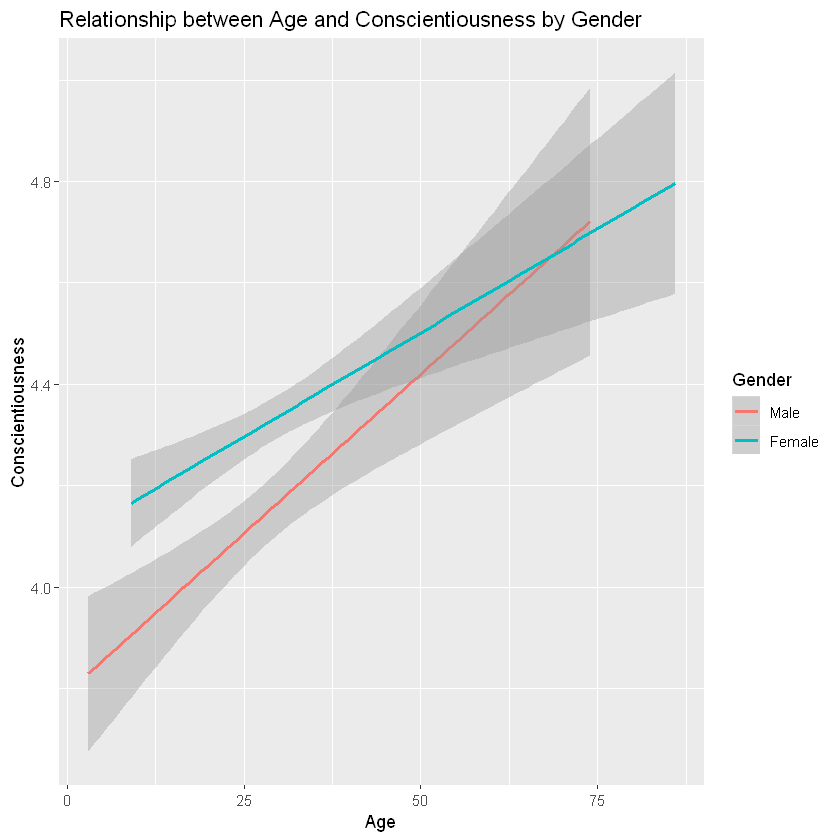

In [14]:
ggplot(aes(x=age, y=conscientious, color = factor(gender)),data=bfi_data) +
  geom_smooth(method="lm") +
  scale_color_discrete(name = "Gender", labels = c("Male","Female"))+ 
 labs( x = "Age", y = "Conscientiousness",
 title ="Relationship between Age and Conscientiousness by Gender")

This visualization helps interpret the model output. Conscientiousness appears to increase as age increases but there is no major difference in this trend based on gender.